In [1]:
import torch
import torch.nn as nn 
import torchtext.data as ttd 
import torchtext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import torch.nn.functional as F
import time

In [2]:
df2=pd.read_csv('spam.csv', encoding='latin-1')
df2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df= df2.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns= ['label', 'content']
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df1= df[['content','label']]
df1.head()

,content,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df1.to_csv('HamSpam.csv', index= None)

In [7]:
dataframe= pd.read_csv('HamSpam')
dataframe.head()

,content,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
DEVICE= torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
EMBEDDING_DIM= 128
BATCH_SIZE= 50
NUM_EPOCHS= 5
LEARNING_RATE= .005
VOCABULARY_SIZE= 2000
HIDDEN_DIM= 256
NUM_CLASSES=2
NUM_LAYERS=1

In [8]:
TEXT= torchtext.data.Field(
tokenize= 'spacy', tokenizer_language= 'en_core_web_sm' )
LABEL= torchtext.data.LabelField(dtype= torch.long)

In [9]:
LABEL

In [10]:
fields= [('content', TEXT), ('label', LABEL)]
dataset= torchtext.data.TabularDataset(path= 'HamSpam.csv', format='csv', skip_header= True, fields= fields)
fields

[('content', <torchtext.data.field.Field at 0x2b07c550d08>),
 ('label', <torchtext.data.field.LabelField at 0x2b07d06abc8>)]

In [11]:
train_data, test_data= dataset.split(split_ratio= [.8, .2])
print(f'Num Train: {len(train_data)}')
print(f'Num Test: {len(test_data)}')

Num Train: 4458
Num Test: 1114


In [12]:
train_data, valid_data= train_data.split(split_ratio= [.8, .2])
print(f'Num Train: {len(train_data)}')
print(f'Num Valid: {len(valid_data)}')

Num Train: 3566
Num Valid: 892


In [13]:
print(vars(train_data.examples[0]))

{'content': ['Otherwise', 'had', 'part', 'time', 'job', 'na', '-', 'tuition', '..'], 'label': 'ham'}


In [16]:
TEXT.build_vocab(train_data, max_size= VOCABULARY_SIZE)
LABEL.build_vocab(train_data)


In [17]:
print(f'Vocabulary: {len(TEXT.vocab)}')
print(f'Num of classes: {len(LABEL.vocab)}')

Vocabulary: 2002
Num of classes: 2


In [18]:
print(TEXT.vocab.freqs.most_common(20))


[('.', 3092), ('to', 1376), ('I', 1292), ('you', 1239), (',', 1154), ('?', 966), ('a', 847), ('!', 810), ('the', 761), ('...', 746), ('i', 647), ('and', 576), ('in', 557), ('is', 525), ('me', 491), ('u', 476), ('..', 428), ('for', 415), ('it', 404), ('my', 398)]


In [19]:
#tokens correspondens to the first 10 integers (0, 1, ..., 9)
print(TEXT.vocab.itos[:10])   #itos: integer to sting

['<unk>', '<pad>', '.', 'to', 'I', 'you', ',', '?', 'a', '!']


In [20]:
print(TEXT.vocab.stoi['the'])    #stoi: string to integer

10


In [21]:
print(LABEL.vocab.stoi)

defaultdict(None, {'ham': 0, 'spam': 1})


In [22]:
LABEL.vocab.freqs

Counter({'ham': 3102, 'spam': 464})

In [23]:
vocab= TEXT.vocab
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x000002B07D1A3508>>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'to': 3,
             'I': 4,
             'you': 5,
             ',': 6,
             '?': 7,
             'a': 8,
             '!': 9,
             'the': 10,
             '...': 11,
             'i': 12,
             'and': 13,
             'in': 14,
             'is': 15,
             'me': 16,
             'u': 17,
             '..': 18,
             'for': 19,
             'it': 20,
             'my': 21,
             'your': 22,
             'of': 23,
             'that': 24,
             'on': 25,
             'have': 26,
             "'s": 27,
             '&': 28,
             'do': 29,
             '2': 30,
             ' ': 31,
             'are': 32,
             ';': 33,
             "'m": 34,
             'call': 35,
             'at': 36,
             'be': 37,
             'now':

In [24]:
train_loader, valid_loader, test_loader= \
    torchtext.data.BucketIterator.splits(
        (train_data, valid_data, test_data),
        batch_size= BATCH_SIZE, sort_within_batch= False, 
        sort_key= lambda x: len(x.content), device= DEVICE
    )

In [25]:
print('Train')
for batch in train_loader:
    print(f'Text Matrix Size: {batch.content.size()}')
    print(f'Target Vector Size: {batch.label.size()}')
    break

print('\nValid:')
for batch in valid_loader:
    print(f' text matric size: {batch.content.size()}')
    print(f' target vector size: {batch.label.size()}')
    break

print('\nTest')
for batch in test_loader:
    print(f' text matric size: {batch.content.size()}')
    print(f' target vector size: {batch.label.size()}')
    break

        
        

Train
Text Matrix Size: torch.Size([116, 50])
Target Vector Size: torch.Size([50])

Valid:
 text matric size: torch.Size([6, 50])
 target vector size: torch.Size([50])

Test
 text matric size: torch.Size([5, 50])
 target vector size: torch.Size([50])


In [28]:
class LSTMClassifier(nn.Module):
    
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        
        self.embedding= nn.Embedding(input_dim, embedding_dim) #do word embedding converting 1-hot into a dense format
        
        #self.rnn= nn.LSTMClassifer(embedding_dim, hidden_dim, nonlinearity= 'ReLU')
        
        self.rnn= nn.LSTM(embedding_dim, hidden_dim)
        
        self.fc= nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text):
        
        embedded= self.embedding(text)                  #text= [sentence length, batch size]
        
        output, (hidden, cell)= self.rnn(embedded)      #output= [sentence length, batch size, hidden dim]
        
        hidden.squeeze_(0)                               #hidden dim= [1, batch size, hiddendim]
         
        output= self.fc(hidden) 
        
        return output
    

In [29]:
model= LSTMClassifier(input_dim= len(TEXT.vocab), embedding_dim= EMBEDDING_DIM, hidden_dim= HIDDEN_DIM,
                     num_layers= NUM_LAYERS ,output_dim= NUM_CLASSES #could use 1 for binary classification
                     )

In [30]:
model= model.to(DEVICE)
optimizer= torch.optim.Adam(model.parameters(), lr=.005)

In [32]:
#training
def compute_accuracy(model, data_loader, device):
    
    with torch.no_grad():
        correct_pred, num_examples= 0, 0
        for i, (features, targets) in enumerate(data_loader):
            features= features.to(device)
            targets= targets.to(device)
            
            logits= model(features)
            _, predicted_labels= torch.max(logits, 1)
            
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets.data).sum()
    return correct_pred.float()/num_examples*100

start_time= time.time()

losses= []
accuracies= []
for epoch in range(NUM_EPOCHS):
    model.train()
    
    for batch_idx, batch_data in enumerate(train_loader):
        text= batch_data.content.to(DEVICE)
        labels= batch_data.label.to(DEVICE)
        
        ##frward and backward
        logits= model(text)
        
        loss= F.cross_entropy(logits, labels)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        
        loss.backward()
        
        ##update model parameters
        optimizer.step()
        
        accuracies.append(compute_accuracy(model, valid_loader, DEVICE).item())
        
        ##logging
        if not batch_idx % 50:
            print(f'Epochs: {epoch+1:03d}/{NUM_EPOCHS:03d} |'
                 f'BAtch: {batch_idx:03d}/{len(train_loader):03d} |'
                 f'Loss: {loss:.4f}' )
    
    with torch.set_grad_enabled(False):
        print(f'training accuracy:'
             f'{compute_accuracy(model, train_loader, DEVICE):.2f} % |'
             f'valid accuracy:' 
             f'{compute_accuracy(model, valid_loader, DEVICE):.2f} % |') 
        
    print(f' time elapsed: {(time.time()- start_time)/60: .2f}min |')
print(f' Total training time: {(time.time()- start_time)/60: .2f} min |')

Epochs: 001/005 |BAtch: 000/072 |Loss: 0.4647
Epochs: 001/005 |BAtch: 050/072 |Loss: 0.2997
training accuracy:86.99 % |valid accuracy:84.42 % |
 time elapsed:  4.91min |
Epochs: 002/005 |BAtch: 000/072 |Loss: 0.3292
Epochs: 002/005 |BAtch: 050/072 |Loss: 0.2914
training accuracy:86.99 % |valid accuracy:84.42 % |
 time elapsed:  10.47min |
Epochs: 003/005 |BAtch: 000/072 |Loss: 0.3646
Epochs: 003/005 |BAtch: 050/072 |Loss: 0.5819
training accuracy:86.99 % |valid accuracy:84.42 % |
 time elapsed:  15.68min |
Epochs: 004/005 |BAtch: 000/072 |Loss: 0.3251
Epochs: 004/005 |BAtch: 050/072 |Loss: 0.4403
training accuracy:87.02 % |valid accuracy:84.64 % |
 time elapsed:  20.79min |
Epochs: 005/005 |BAtch: 000/072 |Loss: 0.2780
Epochs: 005/005 |BAtch: 050/072 |Loss: 0.2705
training accuracy:86.99 % |valid accuracy:84.42 % |
 time elapsed:  25.64min |
 Total training time:  25.64 min |


In [33]:
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f} %')

Test accuracy: 87.07 %


Text(0.5, 1.0, 'cross entropy loss')

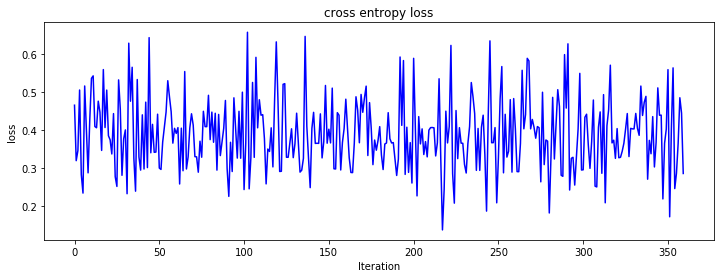

In [60]:
plt.figure(figsize= (12,4))
plt.plot(losses, color='blue')

plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('cross entropy loss')

In [58]:
acc= []
for i in range(len(accuracies)):
     acc.append(accuracies[i]/100)

Text(0.5, 1.0, 'cross entropy accuacy')

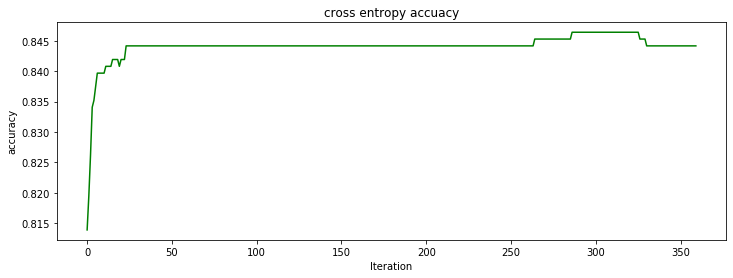

In [56]:
plt.figure(figsize= (12,4))
plt.plot(acc, color= 'green')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.title('cross entropy accuacy')